## Toluca (Links to an external site.) dataset (courtesy of Paul Intrevado)
https://drive.google.com/file/d/1nsKeli0EU_PluE0D7yOL0BnqEajhg3hv/view?usp=sharing

In [9]:
import pandas as pd
df = pd.read_csv('toluca.csv')
df

,lotSize,workHours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361
5,60,224
6,120,546
7,80,352
8,100,353
9,50,157


### Note: as described in the instructions,  lotSize (col 0) is the target

### predictor against the target

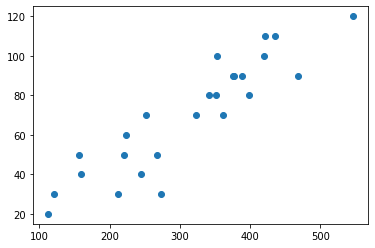

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df.iloc[:,1], df.iloc[:,0], alpha=1)

### residual plot
- It is seen from the structure of residuals that the residual is randomly distributed.

[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'WorkHours')]

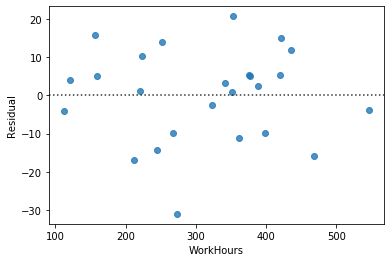

In [11]:
import seaborn as sns

rl = sns.residplot('workHours', 'lotSize', data=df)
rl.set(xlabel='WorkHours', ylabel='Residual')

### coefficients (slope, intercept) against the target

In [13]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(df.drop('lotSize', axis=1), df.iloc[:,0])

print(reg.coef_)
print(reg.intercept_)

[0.2301084]
-1.858251142306358


### square root of mean squared error

In [16]:
import numpy as np
from sklearn.metrics import mean_squared_error
hypotheses = reg.predict(df.drop('lotSize', axis=1))
mse = mean_squared_error(df.iloc[:,0], hypotheses)
print('RMSE:', np.sqrt(mse))

RMSE: 11.88888086607703


## Conclusion
- The range of lotSize is from 30 to 120,while the squrare root of mean_squared_error between hypotheses and target is about 11.  
- Meanwhile, the redidual is randomly distributed.
### So this dataset is suitable for SLR

## Credit (Links to an external site.) dataset 
http://faculty.marshall.usc.edu/gareth-james/ISL/Credit.csv

In [18]:
import pandas as pd
df = pd.read_csv('Credit.csv')
df

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [25]:
features = df[['Income', 'Rating', 'Cards', 'Age', 'Education']]
labels = df['Limit']

### predictor against the target

#### first to do PAC on features to help plotting

In [37]:
from sklearn.preprocessing import StandardScaler
import numpy as np

x = StandardScaler().fit_transform(features.values)
# check if it worked
print(np.mean(x),np.std(x))

1.2345680033831742e-16 1.0


In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principal_Component = pca.fit_transform(x)

principal_feature = pd.DataFrame(data = principal_Component, columns = ['feature_principal'])
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.36822128]


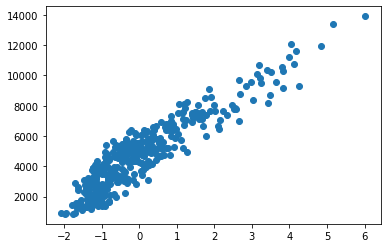

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(principal_feature, labels, alpha=1)

### residual plot
- It is seen from the structure of residuals that the residual is randomly distributed.¶

In [51]:
### construst a temp df for residual plot
temp_df = principal_feature
temp_df['Limit'] = labels
temp_df.head()

,feature_principal,Limit
0,-1.193447,3606
1,2.087034,6645
2,2.143073,7075
3,3.252685,9504
4,0.312905,4897


[Text(0, 0.5, 'Residual'), Text(0.5, 0, 'feature')]

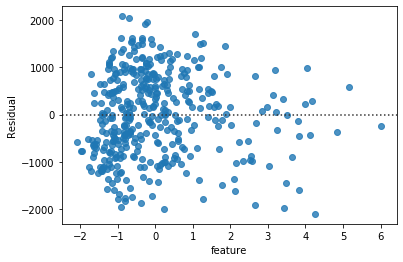

In [50]:
principal_feature
import seaborn as sns
rl = sns.residplot('feature_principal', 'Limit', data=temp_df)
rl.set(xlabel='feature', ylabel='Residual')

### coefficients (slope, intercept) against the target

In [26]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(features, labels)

print(reg.coef_)
print(reg.intercept_)

[  0.11840443  14.88695412 -71.73062805  -0.07547057   3.24917451]
-381.08641789899593


### square root of mean squared error

In [27]:
import numpy as np
from sklearn.metrics import mean_squared_error
hypotheses = reg.predict(features)
mse = mean_squared_error(labels, hypotheses)
print('RMSE:', np.sqrt(mse))

RMSE: 152.38977791747266


In [28]:
df.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


## Conclusion
- The "Limit" column's mean is 4735, std is 2308, which the square root of mean_squared_error is only 152.
- Meanwhile, from the residaul plot, we can see that the residual is randomly distributed. 
- And the scatter plot of principal features against the target¶show a very good linear relationship.

### This data set is suitable for SLR